In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sb

# Markov Chain (MC)

A **Markov chain** is sequence of random variables $\{X_1,X_2,\dots\}$ satisfying the Markov property
$$
Pr(X_{n+1}\in A|X_1=x_1,\dots,X_n=x_n)=Pr(X_{n+1}\in A|X_n=x_n)
$$
for all $A\subset\Omega$. 

The Markov chain $\{X_1,X_2,\dots\}$ is **time-homogeneous** if we have
$$
Pr(X_{n+1}\in A|X_n=x_n)=Pr(X_2\in A|X_1=x_1).
$$

We will see that both the classic Metropolis–Hastings (M–H) Algorithm and the classic Gibbs Sampler generate time-homogeneous chains. So we will only consider time-homogeneous chains in this tutorial, and refer to them simply by Markov chains.

## Stationary distribution

Here for simplicity, we mainly consider the finite sample space $\Omega=\{\omega_i, i=1,\dots,m\}$, in which case a distribution $\pi=(\pi_1,\dots,\pi_m)^T$ is just a vector whose sum is 1, and the conditional probability of the time-homogeneous chain $Pr(X_2=\omega_j|X_1=\omega_i)$ can be represented by a **transition matrix** $P=[p_{ij}]$, $p_{ij}=Pr(X_2=\omega_j|X_1=\omega_i)$ like the following one:

In [16]:
P = np.array([[0.75, 0.25, 0], [0.5, 0, 0.5], [0, 0.5, 0.5]])
print(P)

[[0.75 0.25 0.  ]
 [0.5  0.   0.5 ]
 [0.   0.5  0.5 ]]


We say $\pi$ is a **stationary distribution** of the transition matrix $P$ if $\pi^T=\pi^TP$, which means $\pi$ is a left eigenvector of $P$, with eigenvalue 1.

In [17]:
w, v = np.linalg.eig(P.T)
print(w, 'eigenvalues')
print(v, 'eigenvectors')

pi = v[:, 1] / v[:, 1].sum()
print(np.round(pi, 4), np.round(pi.dot(P), 4))

[-0.3903882  1.         0.6403882] eigenvalues
[[-0.35708982 -0.81649658 -0.77669562]
 [ 0.81444203 -0.40824829  0.17027001]
 [-0.45735221 -0.40824829  0.60642562]] eigenvectors
[0.5  0.25 0.25] [0.5  0.25 0.25]


If the Markov chain is **irreducible** and **aperiodic**, then there is an unique stationary distribution $\pi$, and there is $P^n\to\mathbf{1}\pi^T$. This is stated by the [Perron–Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem). Actually, there is a [weak form of the Perron-Frobenius Theorem](https://sv.20file.org/up1/1179_0.pdf) guarantees the existence of the stationary distribution almost without any conditions. The uniqueness of $\pi$ holds when $P$ is irreducible whether it is periodic or not (check it [here](https://services.math.duke.edu/~rtd/EOSP/EOSP2E.pdf)). The aperiodic only plays a role in $P^n\to\mathbf{1}\pi^T$. 

In [18]:
print(np.linalg.matrix_power(P, 10000))

[[0.5  0.25 0.25]
 [0.5  0.25 0.25]
 [0.5  0.25 0.25]]


* Please check the definitions on the lecture note to construct transition matrices that are reducible or periodic respectively, check their theoretical properties. 

In [2]:
# reducible
P1 = np.array([[0.5, 0.5, 0], [0.5, 0.5, 0], [0, 0, 1]])
print(P1)

print('eigenvalues and eigenvectors:')
w1, v1 = np.linalg.eig(P1.T)
print(w1)
print(v1)

pi1 = v1[:, 0] / v1[:, 0].sum()
print(np.round(pi1, 4), np.round(pi1.dot(P1), 4))
pi1 = v1[:, 2] / v1[:, 2].sum()
print(np.round(pi1, 4), np.round(pi1.dot(P1), 4))

print('power of matrix:')
print(np.linalg.matrix_power(P1, 10000))

[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
eigenvalues and eigenvectors:
[1.00000000e+00 1.11022302e-16 1.00000000e+00]
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[0.5 0.5 0. ] [0.5 0.5 0. ]
[0. 0. 1.] [0. 0. 1.]
power of matrix:
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]


In [3]:
print(np.linalg.matrix_power(P1, 10001))
print(np.linalg.matrix_power(P1, 10002))
print(np.linalg.matrix_power(P1, 10003))

[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]


In [21]:
# periodic 
P2 = np.array([[0, 0, 1], [0, 0, 1], [0.5, 0.5, 0]])
print(P2)

print('eigenvalues and eigenvectors:')
w2, v2 = np.linalg.eig(P2.T)
print(w2)
print(v2)

pi2 = v2[:, 2] / v2[:, 2].sum()
print(np.round(pi2, 4), np.round(pi2.dot(P2), 4))

print('power of matrix:')
print(np.linalg.matrix_power(P2, 10000))
print(np.linalg.matrix_power(P2, 10001))

[[0.  0.  1. ]
 [0.  0.  1. ]
 [0.5 0.5 0. ]]
eigenvalues and eigenvectors:
[-1.00000000e+00 -8.66277536e-17  1.00000000e+00]
[[ 4.08248290e-01 -7.07106781e-01 -4.08248290e-01]
 [ 4.08248290e-01  7.07106781e-01 -4.08248290e-01]
 [-8.16496581e-01 -1.83954421e-17 -8.16496581e-01]]
[0.25 0.25 0.5 ] [0.25 0.25 0.5 ]
power of matrix:
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
[[0.  0.  1. ]
 [0.  0.  1. ]
 [0.5 0.5 0. ]]


In [22]:
print(np.linalg.matrix_power(P2, 10002))
print(np.linalg.matrix_power(P2, 10003))

[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
[[0.  0.  1. ]
 [0.  0.  1. ]
 [0.5 0.5 0. ]]


The stationary distribution on infinite and continuous state space is much more complicated, please google it if you want to know more about it. Consider for example, the chain on the space $\Omega=\{1,2,\dots\}$ in which the transitions are from $\omega$ to $\omega+1$ with probability 2/3 and from $\omega$ to $\max(\omega-1,1)$ with probability 1/3. The chain is irreducible and aperiodic, but it will wander off to positive infinity and fail to have a stationary distribution.

## Ergodic theorem

In a general sample space, if a Markov chain $\{X_1,X_2,\dots\}$ is irreducible, aperiodic, and **positive recurrent**, then it is **ergodic** and we have the **law of large numbers** for it: 
$$
\lim_{n\to\infty}\frac{1}{n}\sum_{i=1}^nf(X_i)=E_\pi[f], a.s., 
$$
for any initial point $X_1=\omega_i$ and any real-valued function $f$ with finite $E_\pi[f]$, where $\pi$ is the corresponding stationary distribution. This theorem justifies the use of the Markov chains in Monte Carlo. 

In a classic estimation problems about the distribution $\pi$, such as to estimate $E_\pi[f]$, the first question is how to construct a conditional distribution to build a time-homogeneous chain having $\pi$ as its stationary distribution. According to the definition of stationary distribution in the finite sample space, we need to construct a transition matrix $P=[p_{ij}]$ such that
$$
\sum_{i=1}^m\pi_ip_{ij}=\pi_j=\sum_{i=1}^m\pi_jp_{ji}, 
$$
for any $j$. 

A sufficient condition is to focus on the matrix with the property that $\pi_ip_{ij}=\pi_jp_{ji}$ for any $i,j$, which is called the **detailed balance** condition. A chain with detailed balance is said to be reversible. To see why it is called reversible, try to prove: 

* (skip) If $X_1\sim\pi$, a Markov chain with detailed balance would have $Pr(X_i=x_i,\dots,X_j=x_j)=Pr(X_i=x_j,\dots,X_j=x_i)$ for $i<j$. 

Define $\pi(x_i)=Pr(X=x_i)$ for $X\sim\pi$, define $P(x_j|x_i)=Pr(X_2=x_j|X_1=x_i)$, easy to see that
\begin{align}
P(X_i=x_i,\dots,X_j=x_j)&=\pi(x_i)\prod_{k=i}^{j-1}P(x_{k+1}|x_k)\\
&=\pi(x_i)\prod_{k=i}^{j-1}\frac{\pi(x_{k+1})P(x_k|x_{k+1})}{\pi(x_k)}\\
&=\pi(x_j)\prod_{k=i}^{j-1}P(x_k|x_{k+1})\\
&=P(X_i=x_j,\dots,X_j=x_i).
\end{align}

Altought the detailed balance condition seems a very restricted condition compare to the original definition of stationary distribution, it still leaves enough degree of freedom for us to construct various transition matrix. 

**Think further:** Compute and compare the degree of freedom for the general transition matrix, the transition matrix satifying the definition of a stationary distribution and the transition matrix with detailed balance. 

# MCMC

## Metropolis-Hastings

Consider to draw samples from a target distribution $\pi$, given any conditional distribution $q(y|x)$ which is called the proposal distribution like in the Importance Sampling, the original transition procedure is that

*Given $X_n=x$, we draw $y$ from $q(y|x)$, and accept $X_{n+1}=y$.*

We can adjust this transition procedure by a simple acceptance-rejection step, so that the generated Markov chain would have $\pi$ as its stationary distribution: 

*Given $X_n=x$, we draw $y$ from $q(y|x)$, and accept $X_{n+1}=y$ with probability $\alpha(x\to y)$, otherwise reject $y$ and put $X_{n+1}=x$.*

This adjustment is to achieve the detailed balance with repect to $\pi$, so the acceptance probability $\alpha(x\to y)$ must be related to $x$ and $y$ and have
$$
\pi(x)q(y|x)\alpha(x\to y)=\pi(y)q(x|y)\alpha(y\to x). 
$$
To obtain the above equality, a simple idea is to put $\alpha(x\to y)=\lambda\pi(y)q(x|y)$ and $\alpha(y\to x)=\lambda\pi(x)q(y|x)$ where $\lambda$ is a small positive number to ensure that the two acceptance probabilities are less or equal to 1. We know that the larger $\alpha$ the quicker the Markov chain explore the sample space and so we set $\lambda=1/\max(\pi(x)q(y|x),\pi(y)q(x|y))$, which is equivalent to have
$$
\alpha(x\to y)=\frac{\pi(y)q(x|y)}{\max(\pi(x)q(y|x),\pi(y)q(x|y))}=\min(\frac{\pi(y)q(x|y)}{\pi(x)q(y|x)},1), 
$$
which is the acceptance probability in **Metropolis-Hastings algorithm**. So, the MH algorithm in some sense is an algorithm with the highest acceptance probability, according to the [Peskun’s Theorem](https://www2.stat.duke.edu/~scs/Courses/Stat376/Papers/ConvergeRates/Peskun1973.pdf), a high acceptance probability can generally result in a low variance in later estimation. 

It is extremely important that, different from the Rejection Sampling, when the new sample $y$ is rejected, giving $X_{n+1}=X_n=x$, that the repeated value be counted again in the average in the equation of Ergodic theorem. Those repetitions may seem inefficient but they apply a necessary reweighting to the generated points, so, just like the Importance Sampling, the resulting samples would essentially be weighted samples $\{(x_1^*,w_1),\dots,(x_n^*,w_n)\}$, where the $x_i^*$'s are distinct and $w_i$'s are the corresponding repetition times. We will later check the difference between the weights of MCMC and the weights of IS. 

**Think further:** Another important comment is that chains from MH algorithm are not necessary irreducible and it depents on the target $\pi(x)$ and the proposal $q(y|x)$. Please try to give some simple examples. 

### Random walk Metropolis

The **Random Walk** is the most original, natural and popular MH algorithm, we simply use a symmetric [kernel](https://en.wikipedia.org/wiki/Kernel_(statistics)) $K$ as the proposal like the uniform kernel or the Gaussian kernel, i.e., $q(y|x)=K(y-x)$. The symmetry can lead to a simplified acceptance probability
$$
\alpha(x\to y)=\min(\frac{\pi(y)}{\pi(x)},1). 
$$

There are two fundamental drawbacks. The first one is that, just like Sampling Importance Resampling, it is biased but asymptotically unbiased. 

* Try to draw 5 samples from $N(0,1)$ based on the Random Walk with the Gaussian kernel. Set the initial point to be 0 and set the scale parameter or step size to be 0.5. Derive the expectation of their empirical distribution by 1000 simulations. Receive the samples after discard the first 5 values (**burn-in**). What if we instead draw 100 samples or set the step size to be 1 or 3? 

In [4]:
def RW(size, burn, x0, scale):
    pi = st.norm.pdf
    x = np.zeros(size + burn)
    x[0] = x0
    dx = st.norm(scale=scale).rvs(size=size + burn - 1) # q(y|x) = g(y-x) = g(x-y) = g(epsilong)
    for i, u in enumerate(st.uniform.rvs(size=size + burn - 1)):
        new = x[i] + dx[i]
        ratio = pi(new) / pi(x[i])
        x[i + 1] = new if u <= ratio else x[i]
        
    return x[burn:]

def experiment(rep, size, scale):
    X = np.zeros([rep, size])
    for r in range(rep):
        X[r] = RW(size, 5, 0, scale)
        
    X = X.flatten()
    grids = np.linspace(-4, 4, 1000)
    plt.plot(grids, st.norm.pdf(grids))
    plt.hist(X, bins=100, density=True)
    plt.show()

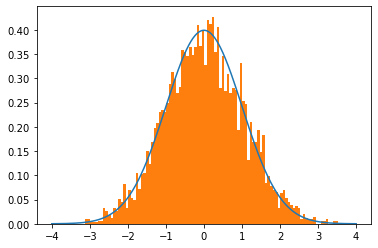

In [5]:
np.random.seed(1997)
experiment(rep=1, size=5000, scale=0.5)


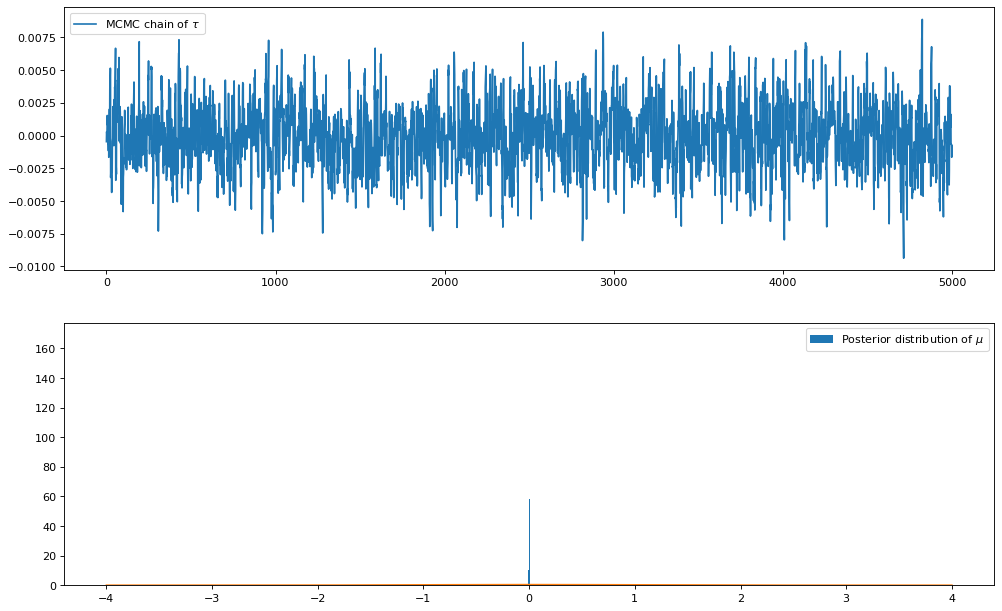

In [11]:
rep=1
size=10000
scale=0.5

rep=1000
size=5
scale=0.001

X = np.zeros([rep, size])
for r in range(rep):
    X[r] = RW(size, 5, 0, scale)
    
X = X.flatten()

figure(figsize=(15, 20), dpi=80) 
plt.subplot(412)
plt.plot(X, label='MCMC chain of $\\tau$')
plt.legend()

plt.subplot(413)
plt.hist(X, bins=100, label='Posterior distribution of $\mu$')
plt.legend()

grids = np.linspace(-4, 4, 1000)
plt.plot(grids, st.norm.pdf(grids))

plt.show()

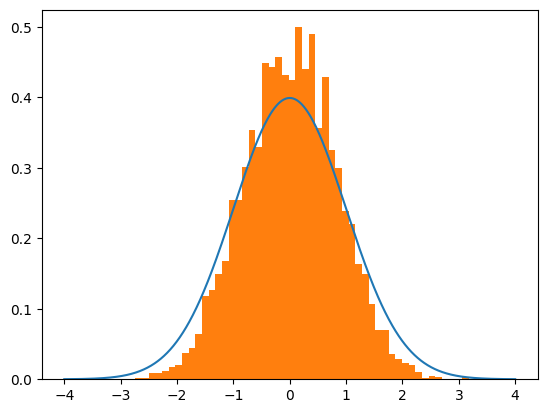

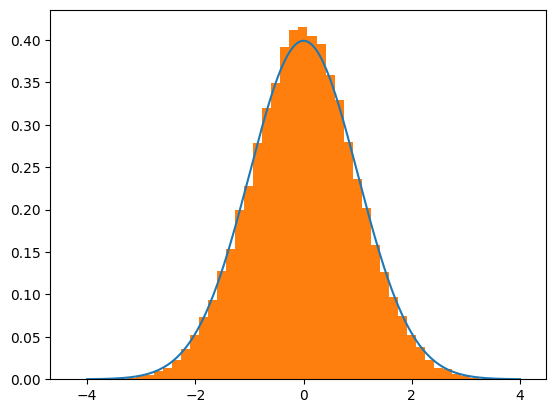

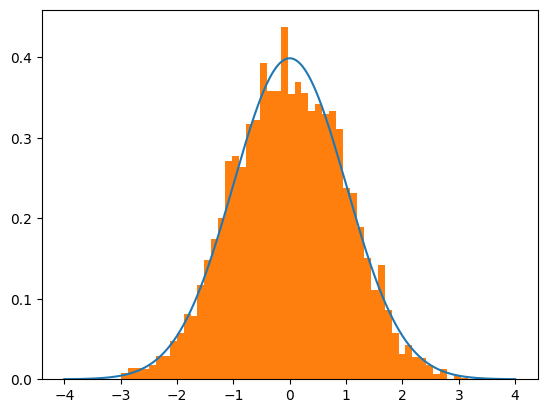

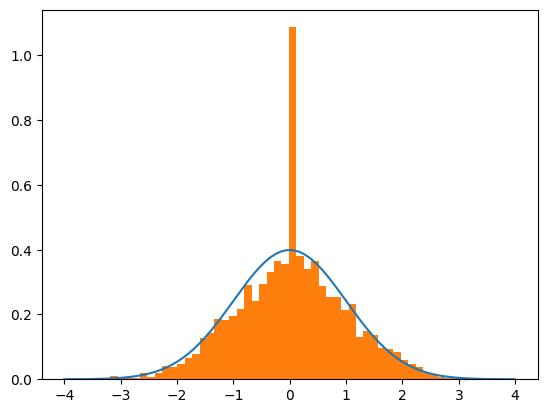

In [19]:
np.random.seed(1997)
experiment(rep=1000, size=5, scale=0.5)
experiment(rep=1000, size=100, scale=0.5)
experiment(rep=1000, size=5, scale=1)
experiment(rep=1000, size=5, scale=3)

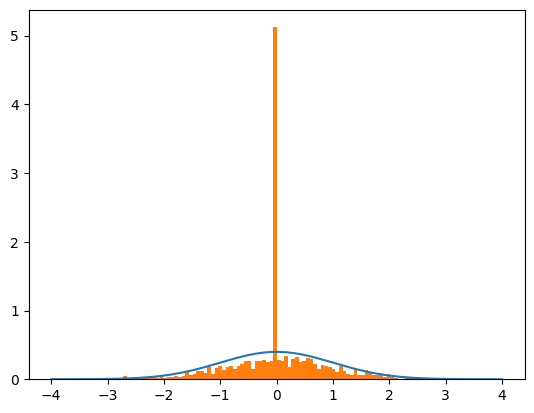

In [22]:
experiment(rep=1000, size=5, scale=6)

The second drawbacks is that, unlike most sampling schemes we learnt so far, MCMC generates statistically dependent samples whose estimation variance is much higher and much difficult to estimate. Actually, there is a [CLT for the Markov chain](https://stats.stackexchange.com/questions/243921/central-limit-theorem-for-markov-chains#:~:text=The%20Central%20Limit%20Theorem%20(CLT,(0%2C%E2%88%9An).), where the **autocovariance** in a Markov chain plays a vital role. Suppose that we want to estimate $\mu=E_\pi[f]$ by $\hat{\mu}=\frac{1}{n}\sum_{i=1}^nf(X_i)$, given that $X_1\sim\pi$, the autocovariance at lag $l$ is $\gamma_l=cov(f(X_1),f(X_{1+l}))$. 

Under some conditions, there would be
$$
\sqrt{n}(\hat{\mu}-\mu)\to N(0,\sigma^2), \sigma^2=\sum_{l=-\infty}^\infty\gamma_l. 
$$
Notice that $\gamma_0=var(f(X_1))$ and $\gamma_l=\gamma_{|l|}$. 

In most cases, we can estimate $\gamma_l$ by the **sample autocovariance**
$$
\hat{\gamma}_l=\frac{1}{n}\sum_{i=1}^{n-l}(x_i-\hat{\mu})(x_{i+l}-\hat{\mu}), 
$$
which can be used to estimate the CLT variance, while it normally does not work well. In practice, to construct the confidence interval, a very simple alternative called [batching](https://www.stat.umn.edu/geyer/5102/notes/mcmc.pdf) is widely used. The main usage of the autocovariance is to quantify the dependence between the elements of a chain by computing the **sample autocorrelation** (ACF)
$$
\hat{\rho}_l=\frac{\hat{\gamma}_l}{\hat{\gamma}_0}. 
$$

* Draw 10000 samples from $N(0,1)$ based on the Random Walk with the Gaussian kernel. Set the initial point to be 0 and the step size to be 0.5. Suppose $f(x)=x$. Derive the first 200 autocorrelation and plot them. You don't need to do burn-in. What if we instead set the step size to be one of \{1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 8\}? Please estimate the $\sigma^2$ in CLT and calculate the acceptance rate for each choose. Plot them against the step size. What's the best step size? 

In [12]:
def experiment(size, nlags):
    x = RW(size, 0, 0, 0.5)
    sm.graphics.tsa.plot_acf(x, lags=nlags)
    plt.show()
    
    scales = np.linspace(0.5, 5, 10)
    scales = np.append(scales, [6, 8])
    acc = []
    sigma2 = []
    for scale in scales:
        x = RW(size, 0, 0, scale)
        acc.append(len(set(x)) / size)
        acf = sm.tsa.acf(x, nlags=nlags, fft=False)
        sigma2.append(np.var(x) * (1 + 2 * acf[1:].sum()))
        
    acc = np.array(acc)
    sigma2 = np.array(sigma2)
        
    fig, ax_left = plt.subplots()
    ax_right = ax_left.twinx()
    ax_left.plot(scales, acc, color='red')
    ax_left.tick_params(axis='y', labelcolor='red')
    ax_left.set_ylabel('acceptance rate', color='red')
    ax_right.plot(scales, sigma2, color='green')
    ax_right.tick_params(axis='y', labelcolor='green')
    ax_right.set_ylabel('estimation variance', color='green')
    plt.show()
    
    mask = sigma2 == sigma2.min()
    print('best:', scales[mask], acc[mask], sigma2[mask])

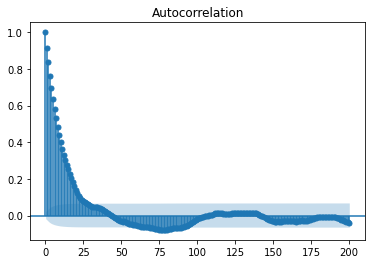

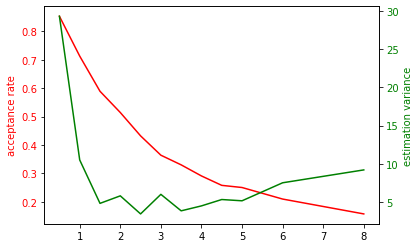

best: [2.5] [0.4319] [3.43289339]


In [13]:
np.random.seed(1997)
experiment(size=10000, nlags=200)

According to a similar [Gaussian experiment](http://www.stat.columbia.edu/~gelman/research/published/A6n41.pdf), when the dimension $d$ is large, it is optimal to tune the step size so that about 23.4\% of new samples are accepted. And in multidimensional Gaussian experiments like this, the best step size is about $2.38/\sqrt{d}$. Furthermore, the efficiency of $n$ IID samples is equivalent to $3dn$ MCMC samples in the simple normal case. 

**Think further:** These results bring lots of insights of MCMC, think about them after class. 

**Think further:** A tradition technique called **thinning** can effectively reduce the dependence in a chain by keeping every $k$th simulation draw from a sequence and discarding the rest. Note that $(k-1)/k$ of the autocorrelations will be discarded. Think about why. 

### Independent Metropolis

Another simple variant of MH algorithm is the **Independent Metropolis** algorithm whose proposal doesn't depend on the previous values in the chain, i.e., $q(y|x)=q(y)$. It does not means that the Independent Metropolis produce IID samples because the acceptance probability still depends on the late value
$$
\alpha(x\to y)=\min(\frac{\pi(y)/q(y)}{\pi(x)/q(x)},1)=\min(\frac{w(y)}{w(x)},1), 
$$
where $w(x)$ is the **importance ratio function** in Importance Sampling. 

A trivial and importance case is to set $q(y)=\pi(y)$, in which case we always have $\alpha(x\to y)=1$ and so the optimal proposal of MCMC is actually just the target distribution. Although the optimal proposal appear in the Independent Metropolis, it does not means that the Independent Metropolis is better than the Random Walk especially when the dimension is big, because the difficult to build a proposal similar to the target grows exponentially as dimension increases. 

Remember that just like the Importance Sampling, MH algorithm can essentially generate weighted samples if we treat the repetition number of a sample in the chain as its weight, i.e., $\{(x_1^*,w_1),\dots,(x_n^*,w_n)\}$. Here we compare the weights of MCMC and IS in a novel way:

*If we pretend the resulting MCMC weights $w_i$'s are IS weights, according to the definition of IS weights, $\pi(x_i^*)/w_i$ would be proportion to a IS proposal and $\pi(x_i^*)/(w_i/\overline{w_i})$ would be close to the IS proposal evaluated at $x_i^*$, and I term it as the **reconstructed proposal**.*

* Draw 10000 samples from $N(1.5,1)$ based on the Independent Metroplis with the Gaussian proposal. Set the initial point to be 0 and the scale parameter to be 2. You don't need to do burn-in. Summarise the resulting samples to be a weighted sample set, compare the reconstructed proposal with the target and MCMC proposal by a plot. 

In [87]:
def IM(size, burn, x0, scale):
    x = np.zeros(size + burn)
    x[0] = x0
    w = lambda x: st.norm.pdf(x, loc=1.5) / st.norm(scale=scale).pdf(x)
    y = st.norm(scale=scale).rvs(size=size + burn - 1)
    for i, u in enumerate(st.uniform.rvs(size=size + burn - 1)):
        ratio = w(y[i]) / w(x[i])
        x[i + 1] = y[i] if u <= ratio else x[i]
        
    return x[burn:]

In [88]:
size=10000
scale=2
x = IM(size, 0, 0, scale)
samples, weights = np.unique(x, return_counts=True)



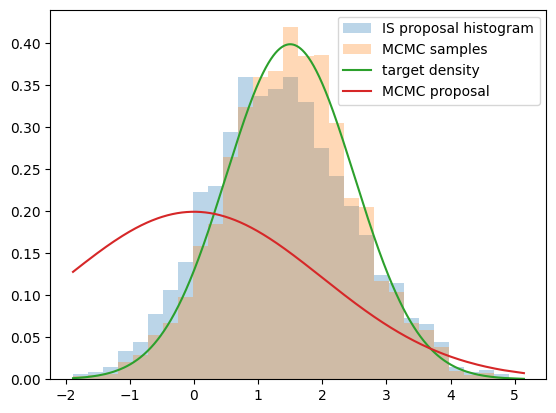

In [89]:
target = st.norm.pdf(samples, loc = 1.5)
proposal_MCMC = st.norm(scale=scale).pdf(samples)

plt.hist(samples, density=True, bins = 30, label='IS proposal histogram', alpha = 0.3)
plt.hist(x, density =True, bins = 30, label = 'MCMC samples', alpha =0.3)
plt.plot(samples, target, label='target density')
plt.plot(samples, proposal_MCMC, label='MCMC proposal')
plt.legend()
plt.show()


This experiment shows that if we pretend MCMC samples are drawn from a IS proposal independently, the IS proposal will imitate the target distribution automatically and the IS proposal itself maybe random. This way to compare the IS and MCMC was proposed by myself. Please contact me if you have any new idea about it. 

## Gibbs sampler

Different from the standard MH algorithm, **Gibbs sampler** solves a problem that what if we can easily draw samples from all the one dimensional **full conditional distributions** $\pi_k(x_k|\mathbf{x}_{-k}),k=1,\dots,K$ by some simple techiques (like those in our first computation tutorial such as the Inversion Method, the Transformation and the Rejection Sampling), how can we construct a better Markov chain leveraging these new information? 

The answer is that we simply construct the conditional distribution of the Markov chain based on the full conditional distributions
$$
q(\mathbf{y}|\mathbf{x})=\prod_{k=1}^K\pi_k(y_k|[\mathbf{y}_{1:k-1},\mathbf{x}_{k+1:K}]), 
$$
where $[\mathbf{y}_{1:k-1},\mathbf{x}_{k+1:K}]$ means we concatenate the first $k-1$ elements of $\mathbf{y}$ with the last $K-k$ elements of $\mathbf{x}$. Just like most MH proposals, this $q(\mathbf{y}|\mathbf{x})$ doesn't achieve detailed balance without an acceptance-rejection step. But still it has $\pi$ as its stationary distribution without the acceptance-rejection step, which differentiate it from the family of MH algorithms. (Recall that the detailed balance is only a sufficient condition. )

The above special property is achieved by a fact that each substep has the detailed balance. Firstly, the $k$'th substep is
$$
q_k(\mathbf{y}|\mathbf{x})=\delta(\mathbf{y}_{-k}=\mathbf{x}_{-k})\pi_k(y_k|[\mathbf{y}_{1:k-1},\mathbf{x}_{k+1:K}])=\delta(\mathbf{y}_{-k}=\mathbf{x}_{-k})\pi_k(y_k|\mathbf{y}_{-k}). 
$$
And then, easy to see that
$$
\pi(\mathbf{x})q_k(\mathbf{y}|\mathbf{x})=\pi(\mathbf{x})\delta(\mathbf{y}_{-k}=\mathbf{x}_{-k})\pi_k(y_k|\mathbf{y}_{-k})=\pi(\mathbf{y})\delta(\mathbf{x}_{-k}=\mathbf{y}_{-k})\pi_k(x_k|\mathbf{x}_{-k})=\pi(\mathbf{y})q_k(\mathbf{x}|\mathbf{y}), 
$$
which is equivalent to say that each substep is a MH step with proposal $q_k(\mathbf{y}|\mathbf{x})$ and acceptance rate 1. This is also an example that MH algorithm may produce reducible chains. 




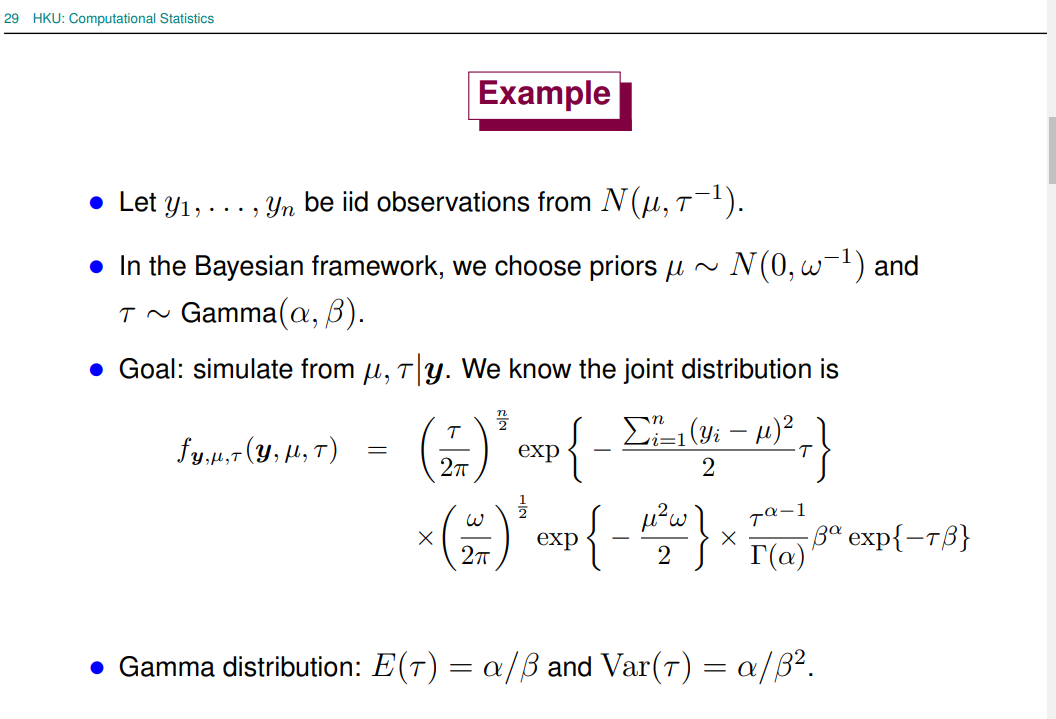
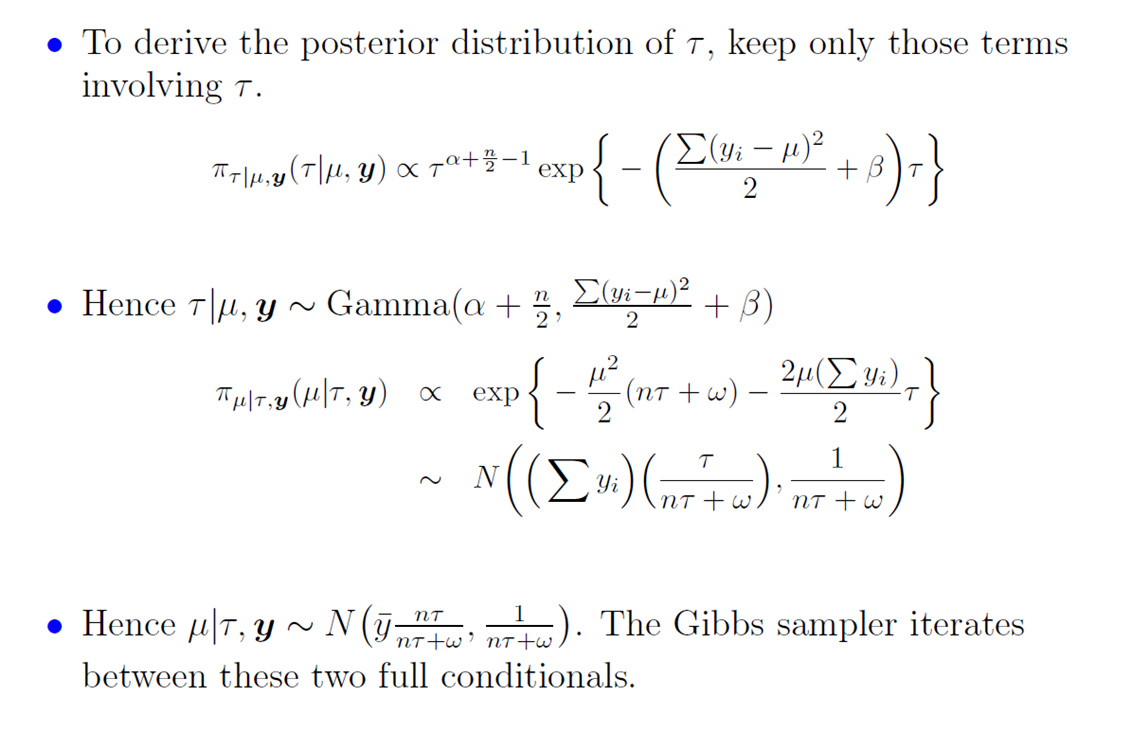

In [9]:
import numpy as np
from scipy.stats import gamma, norm
from matplotlib import pyplot as plt


mu = 0
tau = 1
omega = 1
Alpha = 1
Beta = 1
n = 10
Y = np.random.normal(mu, 1.0/tau, size=n)  #Generate data from normal(mu, 1/tau)
Y_bar = np.average(Y)
n_iter = 10000
n_brunin = 1000

# Initialization
tau_gib = 1
mu_gib = 1
Chain_tau = []
Chain_mu = []

for k in range(n_iter):
    # tau|mu
    tau_gib = np.random.gamma(Alpha+n/2.0, np.sum((Y-mu_gib)**2)/2.0 + Beta)
    # mu|tau
    mu_gib = np.random.normal(Y_bar*n*tau_gib/(n*tau_gib+omega), 1.0/(n*tau_gib+omega))
    Chain_mu.append(mu_gib)
    Chain_tau.append(tau_gib)
Sample_Mu = Chain_mu[n_brunin:]
Sample_Tau = Chain_tau[n_brunin:]


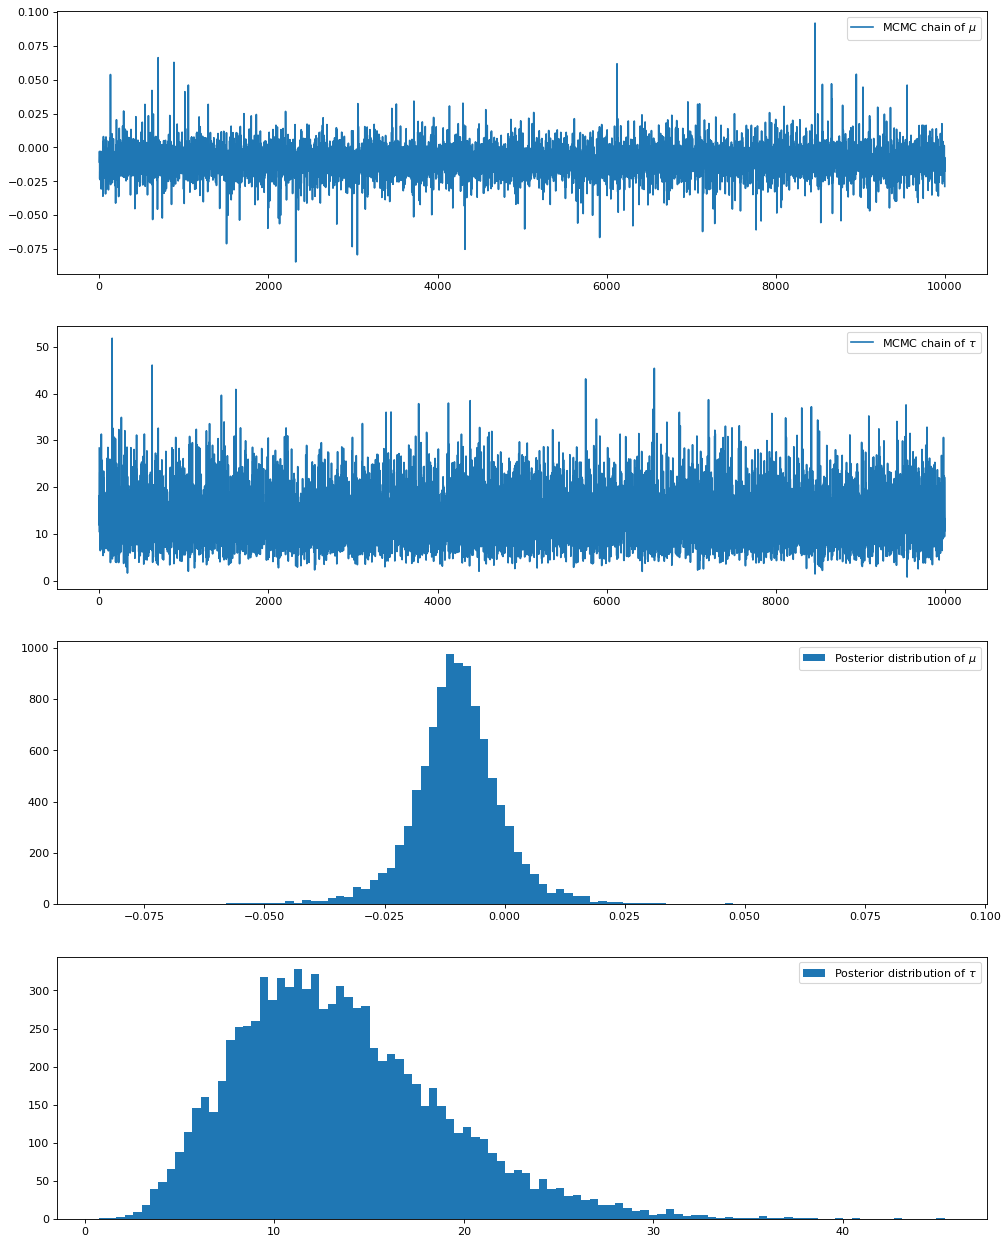

In [11]:

from matplotlib.pyplot import figure

figure(figsize=(15, 20), dpi=80) 

# plot MC chain
plt.subplot(411)
plt.plot(Chain_mu, label='MCMC chain of $\mu$')
plt.legend()

plt.subplot(412)
plt.plot(Chain_tau, label='MCMC chain of $\\tau$')
plt.legend()

plt.subplot(413)
plt.hist(Sample_Mu, bins=100, label='Posterior distribution of $\mu$')
plt.legend()

plt.subplot(414)
plt.hist(Sample_Tau, bins=100, label='Posterior distribution of $\\tau$')
plt.legend()
plt.show()

